In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
import joblib

In [2]:
 from google.colab import files
 files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vikthour","key":"854772165a20adf6b63b62f944d1936f"}'}

In [3]:
#Create a kaggle folder
! mkdir ~/.kaggle

In [4]:
# Copy the kaggle.json file into the /.kaggle folder
! cp kaggle.json ~/.kaggle/

In [5]:
# Permission for the json to be executed.

!chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d saroz014/plant-diseases -p Dataset

100% 6.39G/6.39G [02:15<00:00, 58.9MB/s]
100% 6.39G/6.39G [02:15<00:00, 50.7MB/s]


In [7]:
!unzip Dataset/plant-diseases.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset_itr2/train/Tomato___healthy/065cd824-d515-49f6-a68a-c1b6dd313472___RS_HL 0139.JPG  
  inflating: dataset_itr2/train/Tomato___healthy/065cd824-d515-49f6-a68a-c1b6dd313472___RS_HL 0139_90degFlipLR.JPG  
  inflating: dataset_itr2/train/Tomato___healthy/065cd824-d515-49f6-a68a-c1b6dd313472___RS_HL 0139_90degFlipTB.JPG  
  inflating: dataset_itr2/train/Tomato___healthy/065cd824-d515-49f6-a68a-c1b6dd313472___RS_HL 0139_FlipTB.JPG  
  inflating: dataset_itr2/train/Tomato___healthy/06639369-2e38-48cc-a27a-5b90388d227e___RS_HL 0389.JPG  
  inflating: dataset_itr2/train/Tomato___healthy/06639369-2e38-48cc-a27a-5b90388d227e___RS_HL 0389_90degFlipLR.JPG  
  inflating: dataset_itr2/train/Tomato___healthy/06639369-2e38-48cc-a27a-5b90388d227e___RS_HL 0389_90degFlipTB.JPG  
  inflating: dataset_itr2/train/Tomato___healthy/06639369-2e38-48cc-a27a-5b90388d227e___RS_HL 0389_FlipTB.JPG  
  inflating: dataset_itr2/train/Tomato___health

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Select the directory
plantai_ = Path('/content/dataset_itr2/dataset_itr2/')

# Create the filepath using the directory
filepaths = list(plantai_.glob(r'**/*.JPG'))

# Select the labels
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[-1], filepaths))

# Paths and Labels
filepaths = pd.Series(filepaths, name='Image').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenating both the paths and labels
df = pd.concat([filepaths, labels], axis=1)

df = df.sample(frac=1, random_state = 42).reset_index(drop= True)

Text(0.5, 1.0, 'Number of images in the Training Set')

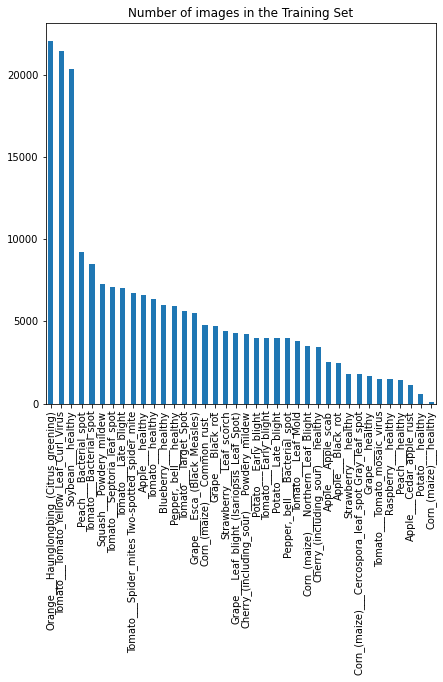

In [10]:
plt.figure(figsize=(7, 7))
labels.value_counts().plot(kind='bar')
plt.title('Number of images in the Training Set')

In [11]:
import random
test_size = 0.2

random_images = np.random.randint(0, (1 - test_size) * len(labels))

In [12]:
plt.style.use('dark_background')

Text(0.5, 1.0, 'Orange___Haunglongbing_(Citrus_greening)')

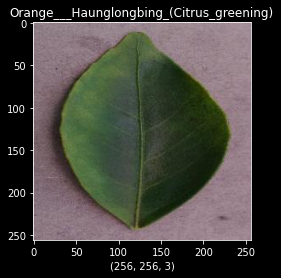

In [13]:
figure = plt.figure(figsize= (4, 4))
x = plt.imread(df["Image"][20])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(df['Label'][20])

In [14]:
df.head()

,Image,Label
0,/content/dataset_itr2/dataset_itr2/train/Tomat...,Tomato___Target_Spot
1,/content/dataset_itr2/dataset_itr2/test/Tomato...,Tomato___Septoria_leaf_spot
2,/content/dataset_itr2/dataset_itr2/train/Soybe...,Soybean___healthy
3,/content/dataset_itr2/dataset_itr2/train/Peppe...,"Pepper,_bell___healthy"
4,/content/dataset_itr2/dataset_itr2/train/Soybe...,Soybean___healthy


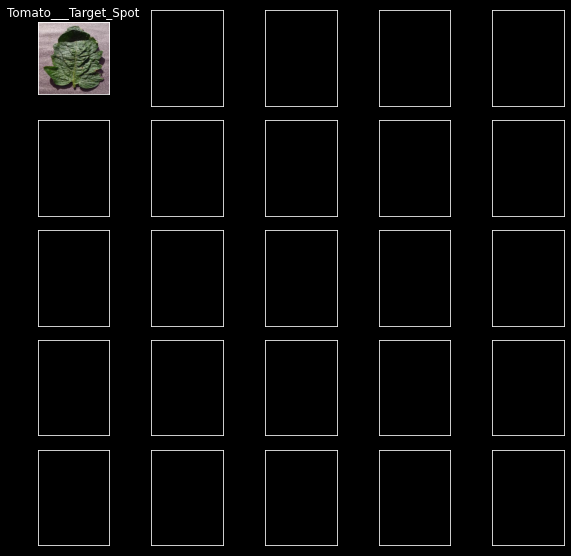

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [15]:
fig, axes = plt.subplots(5, 5, figsize=(8, 8),
                         subplot_kw={"xticks": [], "yticks": []})

for i, ax in enumerate(axes.flat):
  ax.imshow(plt.imread(df['Image'][i]))
  ax.set_title(df['Label'][i])
  plt.tight_layout()
  plt.show()

In [16]:
batch_size = 32
img_height = 64
img_width = 64

In [17]:
train_path = '/content/dataset_itr2/dataset_itr2/train/'
test_path  = '/content/dataset_itr2/dataset_itr2/test/'

In [18]:
train_df = tf.keras.preprocessing.image_dataset_from_directory(train_path, validation_split = 0.2, subset= 'training', seed= 42, 
                                                               image_size = (img_height, img_width), 
                                                               batch_size = batch_size)

val_df = tf.keras.preprocessing.image_dataset_from_directory(train_path, validation_split= 0.2, subset= 'validation', seed = 42,
                                                             image_size = (img_height, img_width), batch_size = batch_size)

test_df  = tf.keras.preprocessing.image_dataset_from_directory(test_path, seed= 42, image_size = (img_height, img_width), 
                                                               batch_size = batch_size)

Found 173808 files belonging to 38 classes.
Using 139047 files for training.
Found 173808 files belonging to 38 classes.
Using 34761 files for validation.
Found 43396 files belonging to 38 classes.


In [19]:
train_df.class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [20]:
for image_batch, labels_batch in train_df:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 64, 64, 3)
(32,)


In [21]:
num_classes = len(train_df.class_names)

model = tf.keras.Sequential([
                             tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
                             tf.keras.layers.Conv2D(32, 3, activation='relu'),
                             tf.keras.layers.MaxPooling2D(),
                             tf.keras.layers.Conv2D(32, 3, activation='relu'),
                             tf.keras.layers.MaxPooling2D(),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(64, activation= 'relu'),
                             tf.keras.layers.Dense(38, activation= 'sigmoid')
])

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

history = model.fit(train_df, validation_data = val_df, epochs = 10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


4346/4346 [==============================] - 777s 178ms/step - loss: 0.8967 - accuracy: 0.7307 - val_loss: 0.4674 - val_accuracy: 0.8479
Epoch 2/10
4346/4346 [==============================] - 741s 170ms/step - loss: 0.3841 - accuracy: 0.8744 - val_loss: 0.3229 - val_accuracy: 0.8949
Epoch 3/10
4346/4346 [==============================] - 733s 169ms/step - loss: 0.2645 - accuracy: 0.9115 - val_loss: 0.2295 - val_accuracy: 0.9253
Epoch 4/10
4346/4346 [==============================] - 741s 170ms/step - loss: 0.2016 - accuracy: 0.9319 - val_loss: 0.2505 - val_accuracy: 0.9197
Epoch 5/10
4346/4346 [==============================] - 740s 170ms/step - loss: 0.1615 - accuracy: 0.9450 - val_loss: 0.2941 - val_accuracy: 0.9091
Epoch 6/10
4346/4346 [==============================] - 745s 171ms/step - loss: 0.1370 - accuracy: 0.9532 - val_loss: 0.2100 - val_accuracy: 0.9363
Epoch 7/10
4346/4346 [==============================] - 744s 171ms/step - loss: 0.1162 - accuracy: 0.9601 - val_loss: 0.219

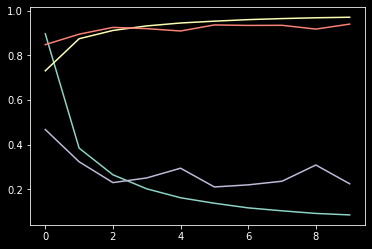

In [22]:
plt.plot(pd.DataFrame(history.history))

In [37]:
model.predict(test_df)

InvalidArgumentError: ignored

In [ ]:
model.summary()

In [28]:
model.save('Plant_disease_ai')

INFO:tensorflow:Assets written to: Plant_disease_ai/assets


# save the model to disk
import pickle

filename = 'plantai_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [34]:
tf.keras.models.save_model(model, 'plant_disease_recog_model.pb')

INFO:tensorflow:Assets written to: plant_disease_recog_model.pb/assets


In [36]:
# Convert the Model to tflite for ease of deployment on mobile.

converter = tf.lite.TFLiteConverter.from_saved_model('/content/plant_disease_recog_model.pb')
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)